In [65]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [62]:
traindf = pd.read_csv('D:\\Documents\\WU\\R Projects\\MNIST\\train.csv')
testdf = pd.read_csv('D:\\Documents\\WU\\R Projects\\MNIST\\test.csv')
traindf.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X, y = traindf[traindf.columns[1:]], traindf['label']

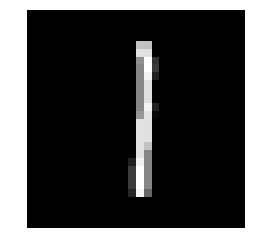

In [63]:
#Plot a digit
sample_digit = X.loc[2700,]
sample_digit = np.array(sample_digit)
sample_digit = sample_digit.reshape(28,28)
plt.imshow(sample_digit, cmap = 'gray',
           interpolation="nearest")
plt.axis('off')
plt.show()

In [61]:
#It looks like a 1 and is actually 1
y[2700]

1

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)